In [70]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import load_diabetes 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model
%matplotlib inline

## Curve Fitting 

### Declaration of Dataset

In [73]:
#declaration of jabetis data set 
jabetis=load_diabetes()
#converting the jabetis data to csv
df= pd.DataFrame(jabetis.data,columns=
                 jabetis.feature_names)
df['progress']=jabetis.target
df.to_csv('Diabetes.csv')
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progress
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


### Multiple Linear Regression

<Figure size 576x432 with 0 Axes>

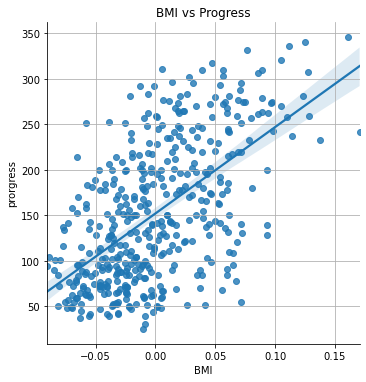

In [74]:
plt.figure(figsize=(8,6))
sns.lmplot(x='bmi',y='progress', data=df)
plt.title('BMI vs Progress')
plt.xlabel('BMI')
plt.ylabel('prorgress')
plt.grid()

<Figure size 576x432 with 0 Axes>

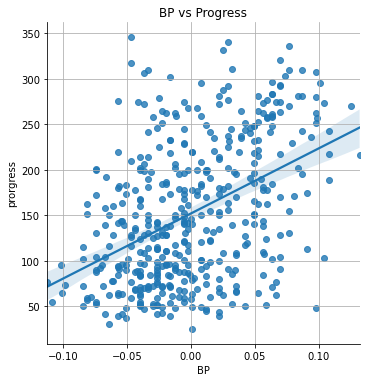

In [75]:
plt.figure(figsize=(8,6))
sns.lmplot(x='bp',y='progress', data=df)
plt.title('BP vs Progress')
plt.xlabel('BP')
plt.ylabel('prorgress')
plt.grid()

<Figure size 576x432 with 0 Axes>

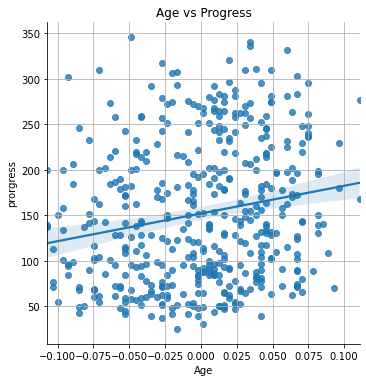

In [76]:
plt.figure(figsize=(8,6))
sns.lmplot(x='age',y='progress', data=df)
plt.title('Age vs Progress')
plt.xlabel('Age')
plt.ylabel('prorgress')
plt.grid()

<Figure size 576x432 with 0 Axes>

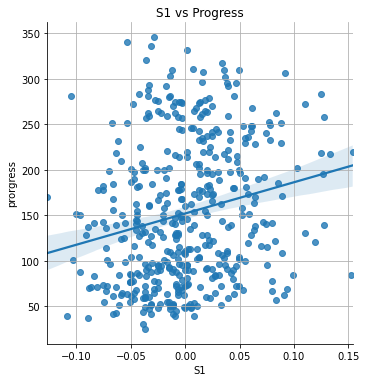

In [77]:
plt.figure(figsize=(8,6))
sns.lmplot(x='s1',y='progress', data=df)
plt.title('S1 vs Progress')
plt.xlabel('S1')
plt.ylabel('prorgress')
plt.grid()

<Figure size 576x432 with 0 Axes>

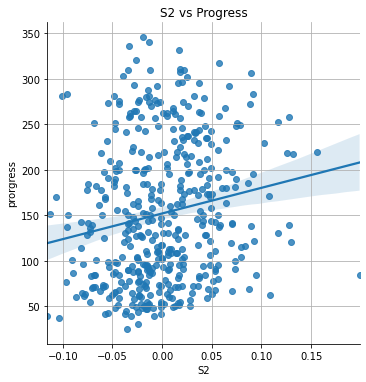

In [78]:
plt.figure(figsize=(8,6))
sns.lmplot(x='s2',y='progress', data=df)
plt.title('S2 vs Progress')
plt.xlabel('S2')
plt.ylabel('prorgress')
plt.grid()

<Figure size 576x432 with 0 Axes>

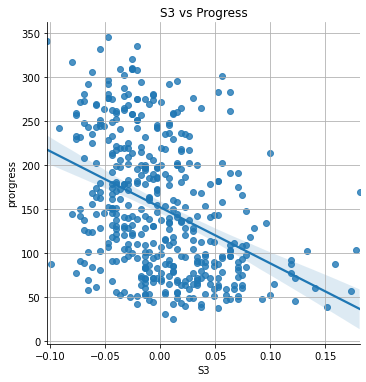

In [79]:
plt.figure(figsize=(8,6))
sns.lmplot(x='s3',y='progress', data=df)
plt.title('S3 vs Progress')
plt.xlabel('S3')
plt.ylabel('prorgress')
plt.grid()

<Figure size 576x432 with 0 Axes>

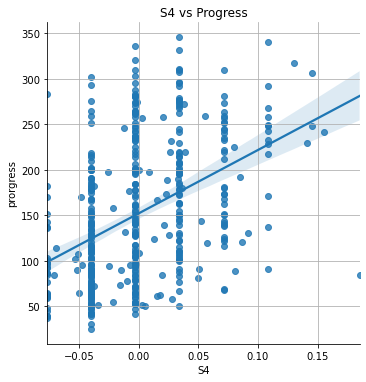

In [80]:
plt.figure(figsize=(8,6))
sns.lmplot(x='s4',y='progress', data=df)
plt.title('S4 vs Progress')
plt.xlabel('S4')
plt.ylabel('prorgress')
plt.grid()

<Figure size 576x432 with 0 Axes>

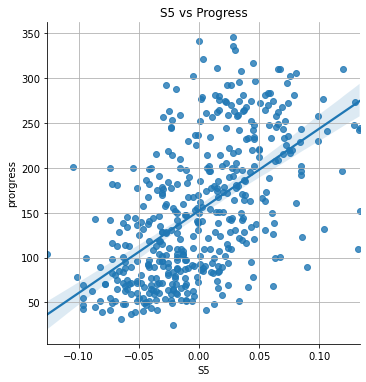

In [81]:
plt.figure(figsize=(8,6))
sns.lmplot(x='s5',y='progress', data=df)
plt.title('S5 vs Progress')
plt.xlabel('S5')
plt.ylabel('prorgress')
plt.grid()

<Figure size 576x432 with 0 Axes>

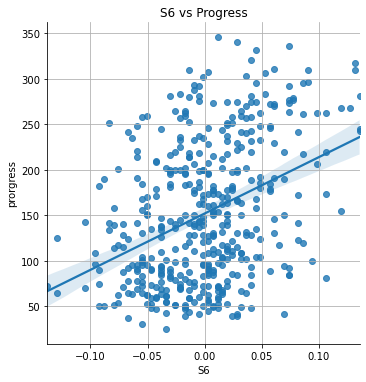

In [82]:
plt.figure(figsize=(8,6))
sns.lmplot(x='s6',y='progress', data=df)
plt.title('S6 vs Progress')
plt.xlabel('S6')
plt.ylabel('prorgress')
plt.grid()

MAE: 43.28
MSE: 2859.69
RMSE: 53.48


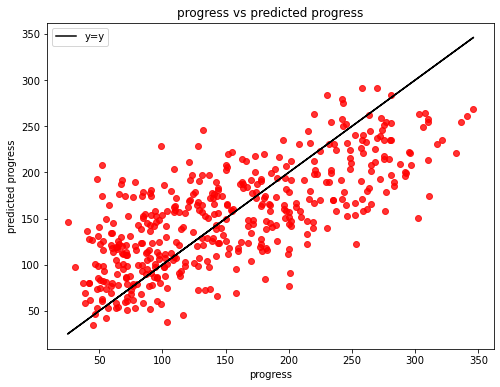

In [83]:
x=df.iloc[:,:-1] 
y=df.iloc[:,-1]

#intercept
X=sm.add_constant(x)

#generated model
sm_model=sm.OLS(y,X).fit()
#result form predicting X
predict= sm_model.predict(X)

#regression evaluation metrics
MAE=round(metrics.mean_absolute_error(y,predict),2)
MSE=round(metrics.mean_squared_error(y,predict),2)
RMSE=round(np.sqrt(metrics.mean_squared_error(y,predict)),2)
print('MAE:',MAE)
print('MSE:',MSE)
print('RMSE:',RMSE)

#plot
plt.figure(figsize=(8,6))
plt.scatter(y,predict,color='r',alpha=0.8)
plt.plot(y,y,color='k',label='y=y')
plt.title('progress vs predicted progress')
plt.xlabel('progress')
plt.ylabel('predicted progress')
plt.legend()
plt.show()



### Polynomial Curve

In [84]:
x=df.iloc[:,:-1] 
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/4, random_state=99)

ln_model=LinearRegression()
ln_model.fit(X_train,y_train)
yHat_test= ln_model.predict(X_test)
yHat_train= ln_model.predict(X_train)


In [85]:
#regression evaluation metrics
lasso_L1=linear_model.Lasso()
lasso_L1.fit(X_train,y_train)
pred_test1=lasso_L1.predict(X_test)
pred_train1=lasso_L1.predict(X_train)
MAE=round(metrics.mean_absolute_error(y_test,pred_test1),2)
MSE=round(metrics.mean_squared_error(y_test,pred_test1),2)
RMSE=round(np.sqrt(metrics.mean_squared_error(y_test,pred_test1)),2)
print('MAE:',MAE)
print('MSE:',MSE)
print('RMSE:',RMSE,'\n')
ridge_L2=linear_model.Ridge()
ridge_L2.fit(X_train,y_train)
pred_test2=ridge_L2.predict(X_test)
pred_train2=ridge_L2.predict(X_train)
MAE=round(metrics.mean_absolute_error(y_test,pred_test2),2)
MSE=round(metrics.mean_squared_error(y_test,pred_test2),2)
RMSE=round(np.sqrt(metrics.mean_squared_error(y_test,pred_test2)),2)
print('MAE:',MAE)
print('MSE:',MSE)
print('RMSE:',RMSE)

MAE: 49.32
MSE: 3504.07
RMSE: 59.2 

MAE: 47.47
MSE: 3285.63
RMSE: 57.32


In [86]:
def plot_curve (estimator,title,X,y,ylim=None,cv=None,n_jobs=None,train_sizes=np.linspace(.1,1.0,5)):
    plt.figure(figsize=(10,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Examples")
    plt.ylabel("Scores")
    train_sizes,train_scores,test_scores=learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean+train_scores_std, alpha=0.1,color='r')
    plt.fill_between(train_sizes,test_scores_mean -test_scores_std,test_scores_mean+test_scores_std, alpha= 0.1,color='g')
    plt.plot(train_sizes,train_scores_mean,'o-',color='r',label="Training Scores")
    plt.plot(train_sizes, test_scores_mean,'o-',color='g',label="Cross-Validation Score")
    
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\khayl\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

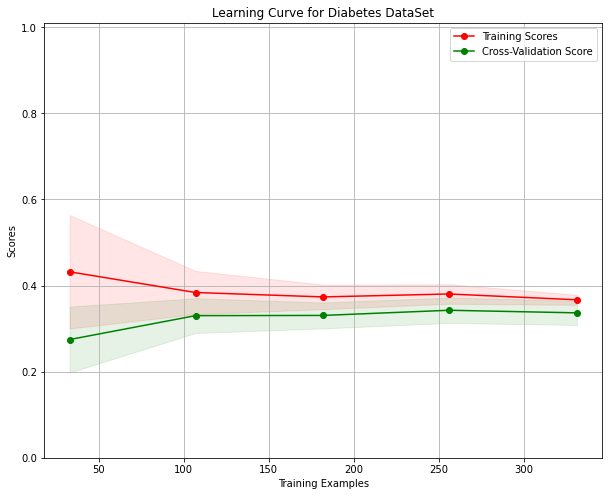

In [87]:
cv=ShuffleSplit(n_splits=10,test_size=1/4,random_state=99)
plot_curve(lasso_L1,"Learning Curve for Diabetes DataSet",X,y,(0.0,1.01),cv=cv)

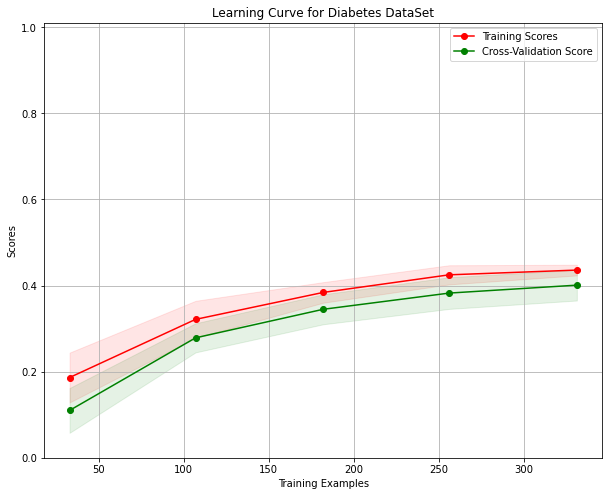

In [88]:
cv=ShuffleSplit(n_splits=10,test_size=1/4,random_state=99)
plot_curve(ridge_L2,"Learning Curve for Diabetes DataSet",X,y,(0.0,1.01),cv=cv)
plt.legend()

### Normal Equation

In [89]:
x=df.iloc[:,-1]
y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32)

class Linear_regression:

    def fit(self,x_train,y_train):
        print(x_train)
        x_new=np.c_[np.ones((len(x_train),1)),x_train]
        print(x_new)
        self.m_c=np.linalg.inv(x_new.T.dot(x_new)).dot(x_new.T).dot(y_train)
        self.m=self.m_c[1:]
        self.c=self.m_c[0:1]
        print(self.m,self.c)

    def predict(self,x_test):
        x_new_test=np.c_[np.ones((len(x_test),1)),x_test]
        y_pred=x_new_test.dot(self.m_c)
        return y_pred

In [98]:
model=Linear_regression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


46     190.0
414    131.0
441     57.0
162    172.0
230    220.0
       ...  
380     52.0
310    109.0
389     51.0
43      92.0
215    263.0
Name: progress, Length: 331, dtype: float64
[[  1. 190.]
 [  1. 131.]
 [  1.  57.]
 [  1. 172.]
 [  1. 220.]
 [  1. 214.]
 [  1.  69.]
 [  1. 248.]
 [  1.  84.]
 [  1.  91.]
 [  1.  75.]
 [  1. 179.]
 [  1. 170.]
 [  1. 261.]
 [  1. 200.]
 [  1.  90.]
 [  1.  39.]
 [  1. 181.]
 [  1. 232.]
 [  1. 295.]
 [  1.  72.]
 [  1.  97.]
 [  1. 102.]
 [  1. 245.]
 [  1.  64.]
 [  1.  66.]
 [  1. 118.]
 [  1.  65.]
 [  1. 257.]
 [  1. 127.]
 [  1. 132.]
 [  1. 206.]
 [  1. 140.]
 [  1. 173.]
 [  1. 178.]
 [  1. 131.]
 [  1. 198.]
 [  1. 248.]
 [  1. 141.]
 [  1. 118.]
 [  1. 180.]
 [  1. 217.]
 [  1. 233.]
 [  1. 128.]
 [  1.  58.]
 [  1. 143.]
 [  1. 131.]
 [  1. 229.]
 [  1. 190.]
 [  1.  96.]
 [  1. 283.]
 [  1. 270.]
 [  1. 242.]
 [  1. 202.]
 [  1.  74.]
 [  1. 173.]
 [  1.  72.]
 [  1. 137.]
 [  1. 263.]
 [  1.  96.]
 [  1. 214.]
 [  1. 144.]
 [  1. 

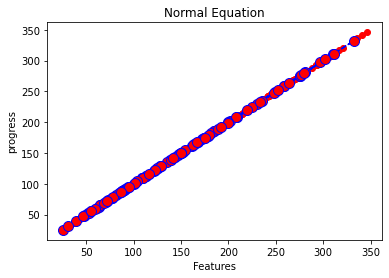

In [99]:
plt.plot(x_test,y_pred,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel("Features")
plt.ylabel("progress")
plt.title("Normal Equation")
plt.show()

## Reference
[1] S. Akkina. "Normal Equation". Github. [Online]. Available: https://github.com/akkinasrikar/Machine-learning-bootcamp/blob/master/Normal%20Equation/Normal%20equation.ipynb. [Accessed 04 May 2021].